# ISLR: Ch3 Lab 1 -- Simple Linear Regression

### In this lab we will perform a simple linear regression using the median home value and socioeconomic status from the boston housing data set.

In [2]:
# perform imports and set-up
import numpy as np
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston # boston data set is part of sklearn
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

In [3]:
boston = load_boston() # load the boston housing data set

In [4]:
print(boston.keys()) # take a look at the keys of the dataset dict

dict_keys(['DESCR', 'target', 'feature_names', 'data'])


In [5]:
print(boston.DESCR) # print off information about the dataset

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Transform the data into a dataframe for analysis

In [6]:
# combine the predictors and responses for a dataframe
predictors = boston.data
response = boston.target
boston_data = np.column_stack([predictors,response])

# now get the column names of the data frame
col_names = np.append(boston.feature_names, 'MEDV')

# create the data frame
boston_df = pd.DataFrame(boston_data, columns = col_names)

In [7]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Regress the LSTAT onto MEDV

Lets start by making a plot of the LSTAT (% of households with low economic status) vs. the MEDV (median home values)

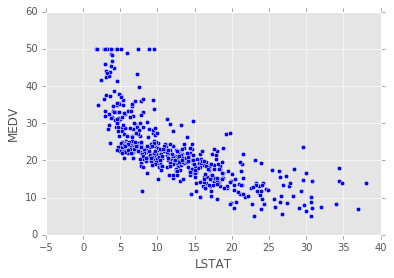

In [8]:
plt.scatter(boston_df.LSTAT.values, boston_df.MEDV.values);
plt.ylabel('MEDV');
plt.xlabel('LSTAT');

#### Now lets get the OLS estimate and plot the estimate using scipy stats

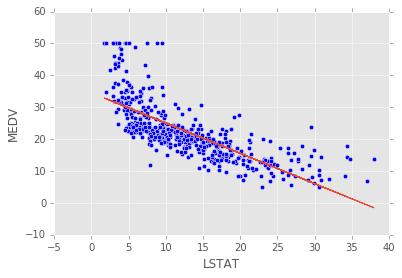

In [9]:
plt.scatter(boston_df.LSTAT.values, boston_df.MEDV.values);
plt.ylabel('MEDV');
plt.xlabel('LSTAT');

beta1, beta0, r_value, p_value, stderr = stats.linregress(boston_df.LSTAT.values,\
                                                          boston_df.MEDV.values)

plt.plot(boston_df.LSTAT.values, beta0 + beta1*boston_df.LSTAT.values);

In [10]:
# print the regression estimates returned from scipy
print(beta0, beta1, r_value, p_value, stderr)

34.5538408794 -0.950049353758 -0.737662726174 5.08110339439e-88 0.0387334162126


In [11]:
# Another method is to use the package statsmodels.
import statsmodels.api as sm

# set the independent variable as the LSTAT
X = boston_df.LSTAT
# We add a constant for the intercept term
X = sm.add_constant(X)
# set the dependent variable
Y = boston_df.MEDV

# create the model instance and fit
model = sm.OLS(Y,X)
results = model.fit()
# data about the model is stored in summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 18 Jun 2016   Prob (F-statistic):           5.08e-88
Time:                        13:39:08   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [13]:
# statsmodels includes a function for makeing prediction intervals from results
prstd, iv_l, iv_u = wls_prediction_std(results)

In [39]:
# statsmodels also includes the confidence intervals for the fitted values (i.e. the mean fits)
# but they are buried in the results of summary table function.
from statsmodels.stats.outliers_influence import summary_table

# lets check out what the summary table returns
help(summary_table)

# call the summary table at a (1-alpha)100% confidence interval level
simpleTable, data, column_names = summary_table(results, alpha=0.05)
# Data contains the confidence intervals we want but we need to make sure we get the right
# columns so lets print off the names
print('column_names: ', column_names)

# now lets get the confidence intervals for the mean fitted values at each x
predicted_mean_ci_low, predicted_mean_ci_high = data[:,4:6].T

Help on function summary_table in module statsmodels.stats.outliers_influence:

summary_table(res, alpha=0.05)
    generate summary table of outlier and influence similar to SAS
    
    Parameters
    ----------
    alpha : float
       significance level for confidence interval
    
    Returns
    -------
    st : SimpleTable instance
       table with results that can be printed
    data : ndarray
       calculated measures and statistics for the table
    ss2 : list of strings
       column_names for table (Note: rows of table are observations)

column_names:  ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


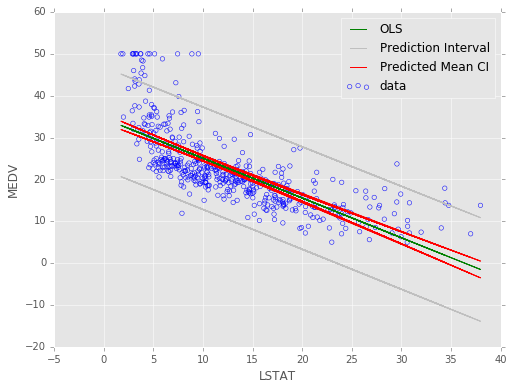

In [55]:
fig, ax = plt.subplots(figsize=(8,6))

# get numpy array values from dataframe
x = boston_df.LSTAT.values
y = boston_df.MEDV.values
# Plot the data
ax.scatter(x, y, facecolors='none', edgecolors='b', label="data")
# plot the models fitted values
ax.plot(x, results.fittedvalues, 'g', label="OLS")

# plot the high and low prediction intervals
ax.plot(x, iv_u, color='0.75',label="Prediction Interval")
ax.plot(x, iv_l, color='0.75')

# plot the high and low mean confidence intervals
ax.plot(x,predicted_mean_ci_low, 'r', label="Predicted Mean CI")
ax.plot(x,predicted_mean_ci_high,'r')

ax.legend(loc='best');

plt.xlabel('LSTAT');
plt.ylabel('MEDV');

### Diagnostic Plots for Linear Model

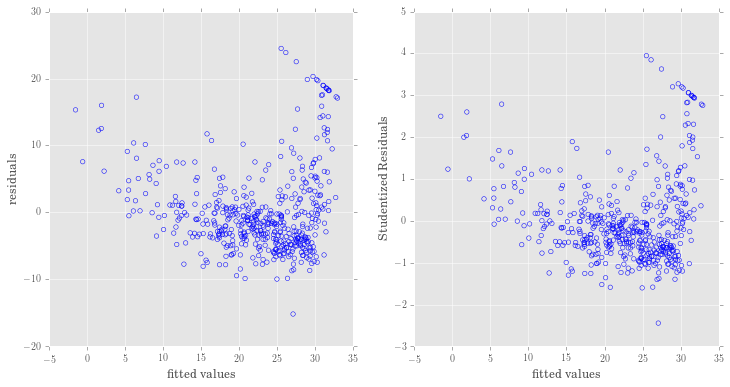

In [94]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

# RESIDUALS
# The results contain the residuals
fitted_values = results.fittedvalues.values
residuals = results.resid.values

# Plot the residual for each fitted value
ax1.scatter(fitted_values, residuals, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
# The residual plot indicates significant nonlinearity (a u-shape pattern is clear)

# STUDENTIZED RESIDUALS
# To asses data outliers we will look at the studentized residuals. This is in the data array 
# returned from summary table (10th column)
studentized_residuals = data[:,10]

# Plot the studentized residuals
ax2.scatter(fitted_values,studentized_residuals, facecolors='none', edgecolors='b');
ax2.set_ylabel('Studentized Residuals');
ax2.set_xlabel('fitted values');

# |studentized residual| > 3 are generally considered outliers

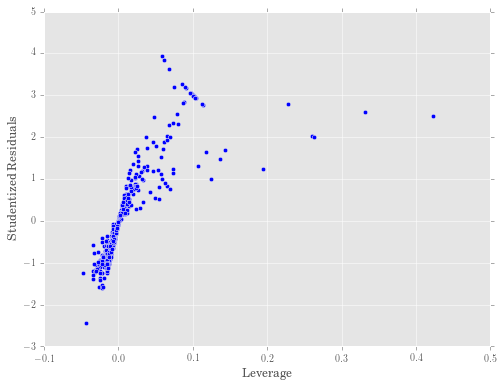

In [116]:
# We can also examine the leverages to identify points that may alter the regression line
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = OLSInfluence(results).influence

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leverage, studentized_residuals);
ax.set_xlabel('Leverage');
ax.set_ylabel('Studentized Residuals');